# Visualización con Pandas y Seaborn
**Autores:** José A. Troyano, Beatriz Pontes    &nbsp;&nbsp;&nbsp; **Última modificación:** 04/03/2022

------------------------------------------------------
## Contenido

1. <a href="#pandas"> Visualización con Pandas </a> <br>
2. <a href="#seaborn"> Visualización con Seaborn  </a> <br>
    2.1 <a href="#distribucion_continuo"> Distribución de atributos continuos  </a> <br>
    2.2 <a href="#frecuencia_discreto"> Fecuencia de atributos discretos  </a> <br>
    2.3 <a href="#media_continuo_discreto"> Media de un atributo continuo en función de atributos discretos  </a> <br>
    2.4 <a href="#distribucion_continuo_discreto"> Distribución de un atributo continuo en función de atributos discretos  </a> <br>
3. <a href="#fechas"> Gráficas basadas en fechas con Pandas y Seaborn  </a> <br>
------------------------------------------------------

La herramienta de referencia de visualización en Python es Matplotlib (https://matplotlib.org/#). Matplotlib es un paquete muy potente, pero a su vez muy complejo, con muchísimas clases y métodos que permiten construir gráficas muy sofisticadas. En este notebook usaremos Matplotlip a través de dos _wrappers_ (proporcionados por Pandas y Seaborn) que nos ayudan a generar gráficas de una forma más sencilla e intuitiva.

Una de los primeros usos que se suele hacer de la visualización es el análisis exploratorio de los datos. Mediante este análisis se pretende descubrir las distribuciones de los atributos, y las posibles interacciones entre atributos. La siguiente gráfica muestra un catálogo básico de diagramas para este tipo de análisis:

![title](img/analisis_exploratorio.png)

Solo veremos algunas de las posibilidades que estas dos herramientas ofrecen. En internet se pueden encontrar muy buenos tutoriales con este tipo de gráficas _en acción_ para hacer lo que se denomina análisis exploratorio sobre datasets concretos. He aquí algunos de muestra:
- A Very Extensive Exploratory Analysis in Python: https://www.kaggle.com/agzamovr/a-very-extensive-exploratory-analysis-in-python
- Visualize World Trends using Seaborn in Python: https://towardsdatascience.com/visualize-world-trends-using-seaborn-in-python-2e563e7d35da
- Dataset exploration. Boston house pricing: http://www.neural.cz/dataset-exploration-boston-house-pricing.html
- The Master Plots: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
- The Python Graph Gallery: https://python-graph-gallery.com/

Empezaremos por la importación de Pandas, Seaborn y Matplotlib, y la instrucción <code>%matplotlib inline</code> que permite renderizar las gráficas en el notebook:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.spatial import distance_matrix
from sklearn.preprocessing import MinMaxScaler

# Para no mostrar 'Future Warnings' producto de que algunos paquetes aún
# trabajan con versiones no actualizadas de otros paquetes
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

En la mayor parte de las secciones de este notebook trabajaremos sobre el dataset bike. La siguiente imagen muestra los atributos y las primeras filas del dataset:

![title](img/dataset.png)

Con las siguientes instrucciones lo leeremos y generaremos algunos atributos categóricos (discretizando atributos continuos) que utilizaremos en algunas gráficas:

In [2]:
# Lectura del dataset bike
DATOS_BIKE = pd.read_csv('./train-bike.csv', parse_dates=['datetime'])
print(DATOS_BIKE[['temp','windspeed','count']].describe())
DATOS_BIKE['temp_level'] = pd.cut(DATOS_BIKE['temp'], bins=[0,15,30,np.inf], labels=['T1', 'T2', 'T3'])
DATOS_BIKE['wind_level'] = pd.cut(DATOS_BIKE['windspeed'], bins=[-0.5,15,30,45,np.inf], labels=['W1', 'W2', 'W3', 'W4'])
DATOS_BIKE['usage'] =  pd.cut(DATOS_BIKE['count'], bins=[0,20,200,np.inf], labels=['LOW', 'MEDIUM', 'HIGH'])
DATOS_BIKE.info()

              temp     windspeed         count
count  10886.00000  10886.000000  10886.000000
mean      20.23086     12.799395    191.574132
std        7.79159      8.164537    181.144454
min        0.82000      0.000000      1.000000
25%       13.94000      7.001500     42.000000
50%       20.50000     12.998000    145.000000
75%       26.24000     16.997900    284.000000
max       41.00000     56.996900    977.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int

## 1. Visualización con Pandas <a name="pandas"> </a>

Las series y dataframes de Pandas ofrecen varios métodos (el más importante de ellos es <code>plot</code>) que se apoyan en métodos de Matplotlib para generar distintos tipos de gráficas.

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/pandas.png)

<AxesSubplot:>

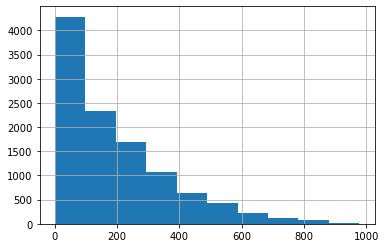

In [3]:
# EJERCICIO: histograma con los valores del atributo 'count'
DATOS_BIKE['count'].hist()

<AxesSubplot:ylabel='usage'>

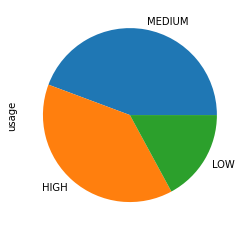

In [4]:
# EJERCICIO: diagrama de tarta con la distribución de valores del atributo 'usage'
DATOS_BIKE['usage'].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='temp', ylabel='humidity'>

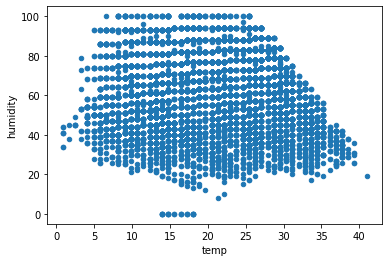

In [5]:
# EJERCICIO: diagrama de puntos para mostar la distribución de 'temp' y 'humidity'
DATOS_BIKE.plot(kind='scatter', x='temp', y='humidity')

<AxesSubplot:xlabel='temp', ylabel='humidity'>

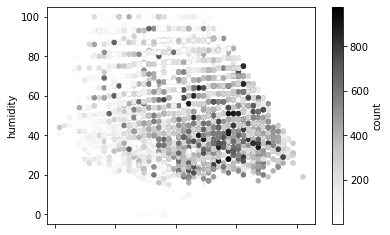

In [6]:
# EJERCICIO: diagrama de puntos para mostar la distribución de 'temp' y 'humidity' usando 'count' para la intensidad de color
# Comparar los diagramas generados con las intensidades de color de usuarios ocasionales y registrados
DATOS_BIKE.plot(kind='scatter', x='temp', y='humidity', c='count')

<AxesSubplot:xlabel='temp', ylabel='humidity'>

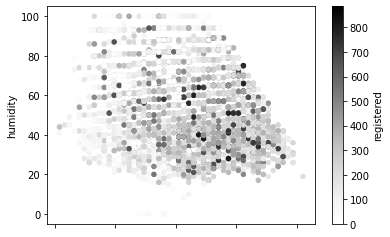

In [7]:
DATOS_BIKE.plot(kind='scatter', x='temp', y='humidity', c='registered')

<AxesSubplot:xlabel='temp', ylabel='humidity'>

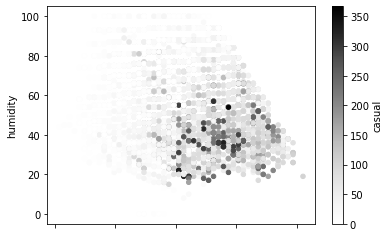

In [8]:
DATOS_BIKE.plot(kind='scatter', x='temp', y='humidity', c='casual')

<AxesSubplot:xlabel='temp', ylabel='humidity'>

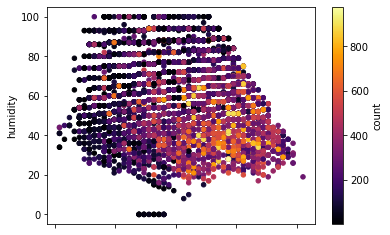

In [9]:
# EJERCICIO: repetir el ejercicio anterior cambiando la escala de colores
# Probar distintas combinaciones. Más información en https://matplotlib.org/stable/tutorials/colors/colormaps.html
DATOS_BIKE.plot(kind='scatter', x='temp', y='humidity', c='count', cmap='inferno')

<AxesSubplot:xlabel='temp', ylabel='humidity'>

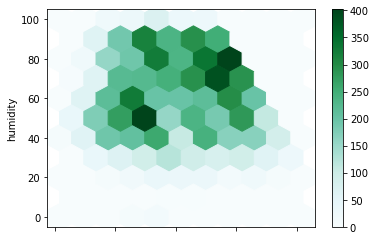

In [10]:
# EJERCICIO: diagrama de celdas para mostrar la distribución de 'temp' y 'humidity'. Probar varios tamaños de celda.
DATOS_BIKE.plot(kind='hexbin', x='temp', y='humidity', gridsize=10)

<AxesSubplot:xlabel='temp', ylabel='humidity'>

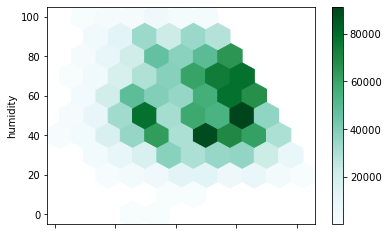

In [11]:
# EJERCICIO: repetir el ejercicio anterior usando distintas funciones de agregación para determinar la intensidad de color:
#   - Función 'len' sobre 'count' para reproducir el gráfico anterior
#   - Distintas funciones matemáticas sobre el atributo 'count'
DATOS_BIKE.plot(kind='hexbin', x='temp', y='humidity', C='count', gridsize=10, reduce_C_function=np.sum)

In [12]:
# EJERCICIO: genera las gráficas que consideres más interesantes haciendo uso de otros atributos del dataset
# Por ejemplo, puedes visualizar la diferencia de uso de bicicletas entre días festivos y laborables, tanto para usuarios registrados como casuales

'''
PENDIENTE
'''

'\nPENDIENTE\n'

In [13]:
# días festivos
'''
PENDIENTE
'''

'\nPENDIENTE\n'

In [14]:
# días laborables
'''
PENDIENTE
'''

'\nPENDIENTE\n'

## 2. Visualización con Seaborn <a name="seaborn"> </a>

Seaborn es una herramienta de visualización que facilta mucho la generación de gráficas sobre Matplotlib. Tiene una muy buena documentación en la que, mediante una galería de imágenes, podemos identificar la imagen que nos interesa junto al fragmento de código necesario para generarla.

Solo veremos algunas de las gráficas que incluye Matplotlib, y las agruparemos en secciones según el tipo de análisis que nos permitan hacer.

### 2.1 Distribución de atributos continuos <a name="distribucion_continuo"> </a>

Muestran el histograma y la estimación KDE de la distribución de probabilidad de uno o dos atributos continuos. KDE (_Kernel Density Estimation_) es una técnica no paramétrica para estimar una distribución de probabilidad a partir de una muestra finita de datos. 

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/distribucion_continuos.png)

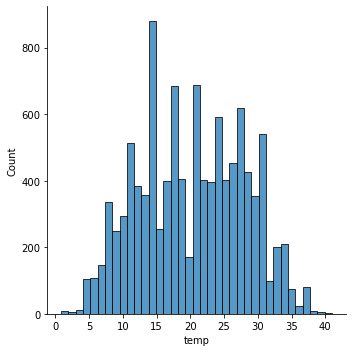

In [15]:
# EJERCICIO:  Mostrar el histograma del atributo 'temp'
# Ver la función displot de seaborn
sns.displot(data=DATOS_BIKE, x='temp')

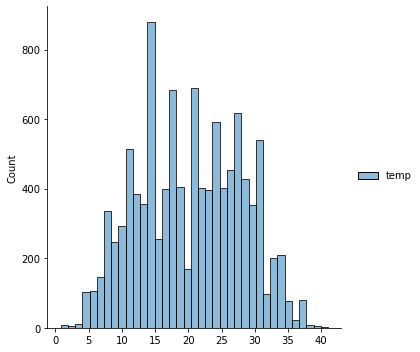

In [16]:
# Otra forma:
sns.displot([DATOS_BIKE['temp']])

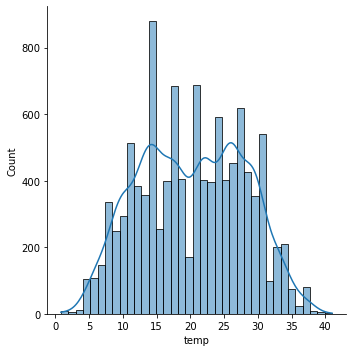

In [17]:
# EJERCICIO: Mostrar un diagrama con histograma y estimación KDE de la distribución de probabilidad del atributo 'temp'
sns.displot(data=DATOS_BIKE, x='temp', kde=True)

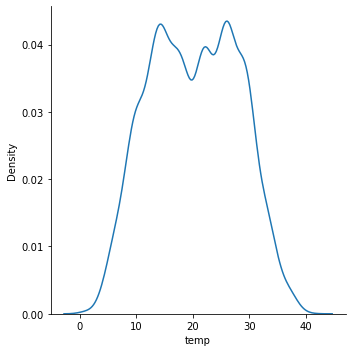

In [18]:
# EJERCICIO: repetir el ejercicio anterior mostrando solo la estimación de la distribución KDE
sns.displot(data=DATOS_BIKE, x='temp', kind='kde')

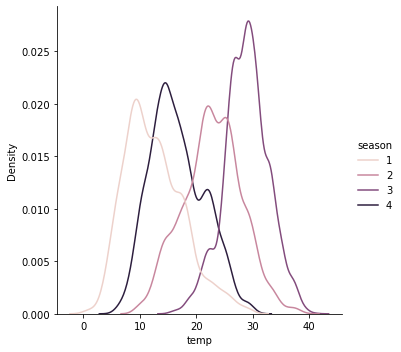

In [19]:
# EJERCICIO: Mostrar las distribuciones de probabilidad para la serie temp según las estaciones del año
# (1: primavera, 2:verano, 3:otoño, 4: invierno)
sns.displot(data=DATOS_BIKE, x='temp', hue='season', kind='kde')

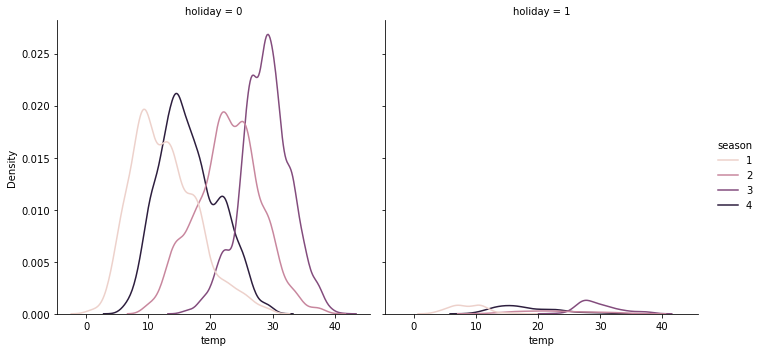

In [20]:
# EJERCICIO: Mostrar dos distribuciones de probabilidad para la serie temp según las estaciones del año:
# - Para días festivos y días laborables
sns.displot(data=DATOS_BIKE, x='temp', kind='kde', col='holiday', hue='season')

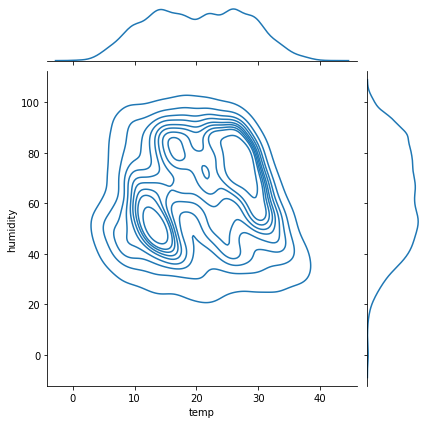

In [21]:
# EJERCICIO: diagrama 2D con la distribución KDE para dos atributos: 'temp' y 'humidity'
# Ver la función jointplot de seaborn
sns.jointplot(data = DATOS_BIKE, x ='temp', y ='humidity', kind='kde')

### 2.2 Frecuencia de atributos discretos <a name="frecuencia_discreto"> </a>

Muestran la frecuencia de aparición de cada uno de los valores del atributo discreto. 

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/frecuencia_discretos.png)

<AxesSubplot:xlabel='usage', ylabel='count'>

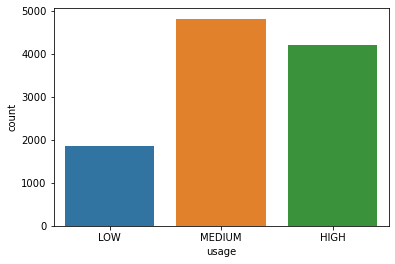

In [22]:
# EJERCICIO: diagrama de barras para el atributo discreto 'usage'
# Ver la función countplot de seaborn
sns.countplot(data=DATOS_BIKE, x='usage')

<AxesSubplot:xlabel='usage', ylabel='count'>

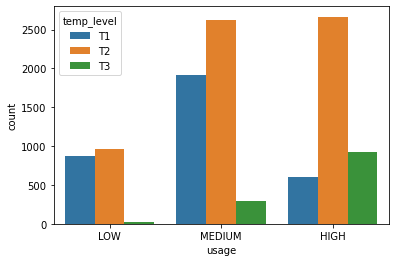

In [23]:
# EJERCICIO: diagrama de barras para el atributo 'usage' detallado según el atributo 'temp_level'
sns.countplot(data=DATOS_BIKE,x='usage',hue='temp_level')

season         1     2     3     4
temp_level                        
T1          1941   247     0  1205
T2           745  2270  1707  1527
T3             0   216  1026     2


<AxesSubplot:xlabel='season', ylabel='temp_level'>

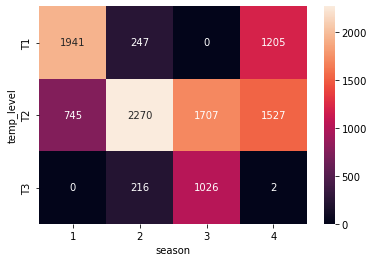

In [25]:
# EJERCICIO: 
#    - Crear una tabla de contingencia con la frecuencia de cada posible pareja de valores de atributos 'temp_level' y 'season'
#      (ver la función crosstab de pandas)
#    - Generar un mapa de calor a partir de la anterior tabla de contingencia
#      (ver la función heatmat de seaborn)
tabla = pd.crosstab(index=DATOS_BIKE['temp_level'],columns=DATOS_BIKE['season'])
print(tabla)
sns.heatmap(tabla,annot=True,fmt='d')

### 2.3 Media de un atributo continuo en función de atributos discretos <a name="media_continuo_discreto"> </a>

Gráficas que muestran la media de un atributo continuo en función los valores de atributos discretos. Podrían adaptarse para mostrar otro indicador.

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/media_continuo_discretos.png)

In [ ]:
# EJERCICIO: diagrama de barras en el que se muestre la media de 'count' detallada según el atributo 'temp_level'
# Ver la función barplot de seaborn


In [ ]:
# EJERCICIO: repetir el ejercicio anterior detallando por 'temp_level' y 'wind_level'


In [ ]:
# EJERCICIO: 
#    - Crear una tabla pivote con la media de 'count' para cada posible pareja de valores de atributos 'temp_level' y 'wind_level'
#      (usar el método pivot_table de DataFrame)
#    - Generar un mapa de calor a partir de la anterior tabla pivot


### 2.4 Distribución de un atributo continuo en función de atributos discretos <a name="distribucion_continuo_discreto"> </a>

Gráficas que muestran la distribución de un atributo continuo en función los valores de atributos discretos.

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/distribucion_continuo_discretos.png)

In [ ]:
# EJERCICIO: diagrama de cuerdas para el atributo 'count' detallado según el atributo 'temp_level'
# Ver la función stripplot de seaborn


In [ ]:
# EJERCICIO: repetir el ejercicio anterior ajustando el parámetro jitter para desvelar el grado de solapamiento


In [ ]:
# EJERCICIO: diagrama de cajas para el atributo 'count' detallado según el atributo 'temp_level'
# Ver la función boxplot de seaborn


In [ ]:
# EJERCICIO: modificar el rango de valores considerados como "normales" con el parámetro whis


In [ ]:
# EJERCICIO: diagrama de cajas para el atributo 'count' detallado según los atributos 'temp_level' y 'wind_level'


In [ ]:
# EJERCICIO: diagrama de violin para el atributo 'count' detallado según el atributo 'temp_level'
# Ver la función violinplot de seaborn


In [ ]:
# EJERCICIO: repetir el ejercicio anterior dedicando cada parte del violín a uno de los dos valores del atributo 'holiday'


## 3. Gráficas basadas en fechas con Pandas y Seaborn <a name="fechas"> </a>

En muchos datasets podemos encontarnos con datos correspondientes a fechas u horas. En esta sección veremos algunas gráficas simples generadas con Pandas y Seborn sobre a partir de este tipo de información. Lo haremos sobre la columna <code>datetime</code> del dataset bike. 

En la siguiente figrura se muestran las gráficas que obtendremos en los ejercicios de esta sección:

![title](img/fechas.png)

In [ ]:
# EJERCICIO: gráfica con la evolución temporal de 'count'. Cada punto de la gráfica se corresponderá con el 
#            total de bicicletas alquiladas en un determinado día. Habrá que, por tanto, agrupar el dataframe por días.
#            - Usar el método groupby de DataFrame


In [ ]:
# EJERCICIO: gráfica 'más suave' que la anterior mostrando la media móvil calculada sobre una ventana de 10
# - Usar el método rolling de Series


In [ ]:
# EJERCICIO: gráfica con el patrón horario de las columnas 'casual' y 'registered'. Cada punto de la gráfica 
#            se corresponderá con el total de bicicletas alquiladas en cada hora. Habrá que, por tanto, agrupar 
#            el dataframe por horas.


In [ ]:
# EJERCICIO: gráfica con el patrón semanal de las columnas 'casual' y 'registered'. Cada punto de la gráfica
#            se corresponderá con el total de bicicletas alquiladas en un día de la semana (lunes, martes, ...). 
#            Habrá que, por tanto, agrupar el dataframe por día de la semana.


In [ ]:
# EJERCICIO: generar un mapa de calor en el que se crucen los patrones de uso horario y día de la semana del atributo 'count'.
#            Cada celda del mapa se corresponderá con la media de bicicletas alquiladas en una determinada hora y día
#            de la semana. No hará falta hacer uso de la agrupación, los valores medios se podrán calcular con una tabla pivot.
